In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import keras.metrics
import keras.regularizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.preprocessing.sequence import TimeseriesGenerator

In [3]:
df = pd.read_csv('BestFeatures.csv', header=0, sep=',',decimal='.', skip_blank_lines=True, parse_dates=['Date'])

df.head()

,SE3,Year,Month,Day,Date,NO,BF95,Diesel,E85,Sunday,...,Diesel(-89),Diesel(-90),Diesel(-91),Diesel(-92),Diesel(-93),Diesel(-94),Diesel(-95),Diesel(-96),SE3(-168),SE3(-336)
0,27.53,2017,3,3,2017-03-03 00:00:00,35222,14.02,13.84,12.01,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,26.47,2017,3,3,2017-03-03 01:00:00,35222,14.02,13.84,12.01,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26.03,2017,3,3,2017-03-03 02:00:00,35222,14.02,13.84,12.01,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28.13,2017,3,3,2017-03-03 03:00:00,35222,14.02,13.84,12.01,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29.92,2017,3,3,2017-03-03 04:00:00,35222,14.02,13.84,12.01,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.set_index('Date', inplace=True)
df = df.drop('Year', axis=1)
cols = list(df.columns.values) 
cols.pop(cols.index('SE3'))
df = df[cols+['SE3']]

In [5]:
df

,Month,Day,NO,BF95,Diesel,E85,Sunday,Monday,Saturday,Tuesday,...,Diesel(-90),Diesel(-91),Diesel(-92),Diesel(-93),Diesel(-94),Diesel(-95),Diesel(-96),SE3(-168),SE3(-336),SE3
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-03 00:00:00,3,3,35222,14.02,13.84,12.01,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,27.53
2017-03-03 01:00:00,3,3,35222,14.02,13.84,12.01,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,26.47
2017-03-03 02:00:00,3,3,35222,14.02,13.84,12.01,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,26.03
2017-03-03 03:00:00,3,3,35222,14.02,13.84,12.01,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,28.13
2017-03-03 04:00:00,3,3,35222,14.02,13.84,12.01,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,29.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-21 19:00:00,7,21,58090,21.61,25.25,19.56,0,0,0,0,...,25.25,25.25,25.25,25.25,25.25,25.25,25.25,49.94,192.50,261.75
2022-07-21 20:00:00,7,21,58090,21.61,25.25,19.56,0,0,0,0,...,25.25,25.25,25.25,25.25,25.25,25.25,25.25,18.08,166.61,208.05
2022-07-21 21:00:00,7,21,58090,21.61,25.25,19.56,0,0,0,0,...,25.25,25.25,25.25,25.25,25.25,25.25,25.25,1.63,165.57,188.67


In [6]:
n_inputs = 24
n_features = df.shape[1]

df_y = df['SE3']

In [7]:
def cross_validator(number: int, size: int, dataset):
    parts = []
    start = 0
    end = size
    for i in range(number):
        parts.append(dataset.iloc[start:end, :])
        start += size
        end += size
    return parts

In [8]:
parts = cross_validator(20, len(df)//20, df)

In [9]:
regressor = Sequential()

regressor.add(LSTM(units = 150, activation="relu", kernel_regularizer=keras.regularizers.L1(),  input_shape = (n_inputs, n_features), dropout=0.20))
regressor.add(Dense(units = 40, activation="sigmoid"))

regressor.add(Dense(units = 1))

regressor.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0002, decay=0.000001), loss="mse",metrics=[keras.metrics.RootMeanSquaredError(name="RMSE"), keras.metrics.MeanAbsoluteError(name="MAE"), keras.metrics.MeanAbsolutePercentageError(name="MAPE")])


59/59 [==============================] - 1s 23ms/step
(2360, 1)
Test Score: 331.56 RMSE
Test Score: 305.03 MAE


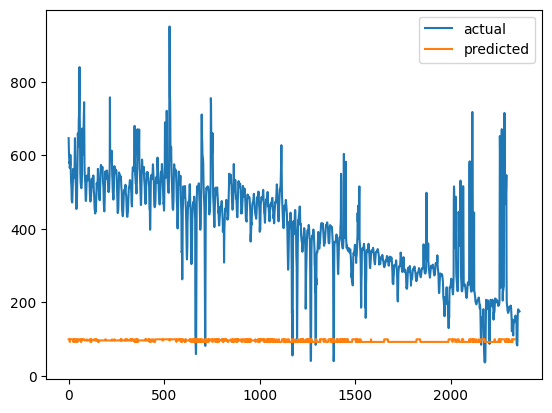

  5/649 [..............................] - ETA: 2:12 - loss: 1446.5800 - RMSE: 37.7183 - MAE: 32.7595 - MAPE: 79.8601

KeyboardInterrupt: 

In [11]:
for i in range(10):
        train_list  = [parts[train_part] for train_part in range(10 + i)]
        train = pd.concat(train_list)
        test = parts[10 + i]

        
        generator_train = TimeseriesGenerator(train, train["SE3"], length=n_inputs, batch_size=40)
        generator_test = TimeseriesGenerator(test, test["SE3"], length=n_inputs, batch_size=40)

        sc =  StandardScaler()
        sc_y = StandardScaler()

        sc.fit(generator_train.data)
        sc_y.fit(generator_train.targets.to_numpy().reshape(-1, 1))

        train = sc.transform(generator_train.data)
        train_y = sc_y.transform(generator_train.targets.to_numpy().reshape(-1, 1))

        test = sc.transform(generator_test.data)
        test_y = sc_y.transform(generator_test.targets.to_numpy().reshape(-1, 1))

        regressor.fit(generator_train, shuffle=True, epochs = 50)

        pred =  regressor.predict(generator_test)

        re_yhat = sc_y.inverse_transform(pred)
        re_y = sc_y.inverse_transform(generator_test.targets.to_numpy().reshape(-1, 1))

        sa = re_y.copy()
        sa = sa[:-n_inputs]

        rmse = np.sqrt(keras.metrics.mean_squared_error(sa[:,0], re_yhat[:,0]))
        mae = keras.metrics.mean_absolute_error(sa[:,0], re_yhat[:,0])
        
        print('Test Score: %.2f RMSE' % (rmse))
        print('Test Score: %.2f MAE' % (mae))


        plt.plot(re_y, label="actual")
        plt.plot(re_yhat, label="predicted")
        plt.legend()
        plt.show()

